<a href="https://colab.research.google.com/github/MakerCsharp/pythone_ai/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9B%D0%A0_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт необходимых библиотек

In [1]:
# Pandas - это библиотека Python, предоставляющая высокоуровневые структуры данных и методы, предназначенные для быстрого и простого анализа данных.
import pandas as pd

# NumPy - это библиотека для языка программирования Python, добавляющая поддержку больших многомерных массивов и матриц, вместе с большой библиотекой высокоуровневых математических функций для операций с этими массивами.
import numpy as np

# Matplotlib - это библиотека визуализации данных для Python, которая позволяет создавать графики и диаграммы различных типов.
import matplotlib.pyplot as plt

# Seaborn - это библиотека визуализации данных Python, основанная на Matplotlib, предоставляющая более высокоуровневый интерфейс для создания красочных и информативных статистических графиков.
import seaborn as sns

# train_test_split - это функция из Scikit-learn (библиотеки для машинного обучения), которая позволяет разделить набор данных на обучающую и тестовую выборки.
from sklearn.model_selection import train_test_split

# LinearRegression - класс из Scikit-learn, предоставляющий функционал для линейной регрессии.
from sklearn.linear_model import LinearRegression

# Импорт метрик для оценки качества модели: среднеквадратическая ошибка (MSE), средняя абсолютная ошибка (MAE) и коэффициент детерминации (R^2).
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Загрузка датасета

In [2]:
# Загрузка данных ВАРИАНТ-1 (выбор файла с компьютера)
# скачать csv файл можно с https://www.kaggle.com/datasets/deepakdodi/gapminder/
from google.colab import files
uploaded = files.upload()

# Загрузка датасета (допустим, у нас есть CSV-файл "gapminder.csv")
data = pd.read_csv("Новая таблица - Лист1 (7).csv")

Saving Новая таблица - Лист1 (7).csv to Новая таблица - Лист1 (7).csv


In [ ]:
# Загрузка данных ВАРИАНТ-2 (загрузка датасета по ссылке)
url = "URL_ВАШЕГО_ДАТАСЕТА"
data = pd.read_csv("gapminder.csv")

Исследование структуры данных

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123,1,6,1,20121,17850,1
1,536365,71053,2,6,2,14305,17850,1
2,536365,84406,3,8,3,27426,17850,1
3,536365,84029,4,6,4,14305,17850,1
4,536365,84029,5,6,5,14305,17850,1


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   InvoiceNo    154 non-null    int64
 1   StockCode    154 non-null    int64
 2   Description  154 non-null    int64
 3   Quantity     154 non-null    int64
 4   InvoiceDate  154 non-null    int64
 5   UnitPrice    154 non-null    int64
 6   CustomerID   154 non-null    int64
 7   Country      154 non-null    int64
dtypes: int64(8)
memory usage: 9.8 KB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,536376.772727,34864.831169,77.500000,18.961039,77.500000,31233.850649,15909.688312,1.097403
std,6.887065,24432.222064,44.600075,55.038891,44.600075,10165.928746,1915.671921,0.318688
min,536365.000000,6743.000000,1.000000,1.000000,1.000000,18.000000,12431.000000,1.000000
25%,536370.250000,21780.500000,39.250000,4.000000,39.250000,23743.000000,14688.000000,1.000000
50%,536376.500000,22626.000000,77.500000,6.000000,77.500000,34700.000000,16098.000000,1.000000
75%,536382.000000,22960.750000,115.750000,11.500000,115.750000,34851.000000,17850.000000,1.000000
max,536389.000000,85123.000000,154.000000,432.000000,154.000000,45748.000000,18074.000000,3.000000


**Давайте разберём каждый из столбцов:**
* **population**: Население. Показывает количество людей в стране или регионе.

* **fertility**: Плодовитость или коэффициент рождаемости. Среднее количество детей, которое может родить женщина на протяжении своей жизни в определенной стране или регионе.

* **HIV**: Вероятно, показатель распространенности ВИЧ или процент населения, инфицированного ВИЧ.

* **CO2**: Уровень выбросов углекислого газа. Может измеряться в тоннах на душу населения или в общем объеме для страны.

* **BMI_male**: Индекс массы тела (ИМТ) для мужчин. Это статистический показатель, вычисляемый на основе роста и веса человека, и используется для определения уровня его физического состояния.

* **GDP**: Валовой внутренний продукт. Может измеряться в абсолютных значениях или на душу населения. Это ключевой показатель экономического развития и благосостояния страны.

* **BMI_female**: Индекс массы тела (ИМТ) для женщин.

* **life**: Продолжительность жизни или средняя ожидаемая продолжительность жизни при рождении.

* **child_mortality**: Детская смертность. Показывает количество смертей детей в определенной возрастной группе (обычно до 5 лет) на 1000 рожденных живыми.

* **Region**: Регион или географическое положение страны. Это категориальный признак, который группирует страны по их географическому расположению или другим схожим характеристикам.

Графики распределения для каждой переменной

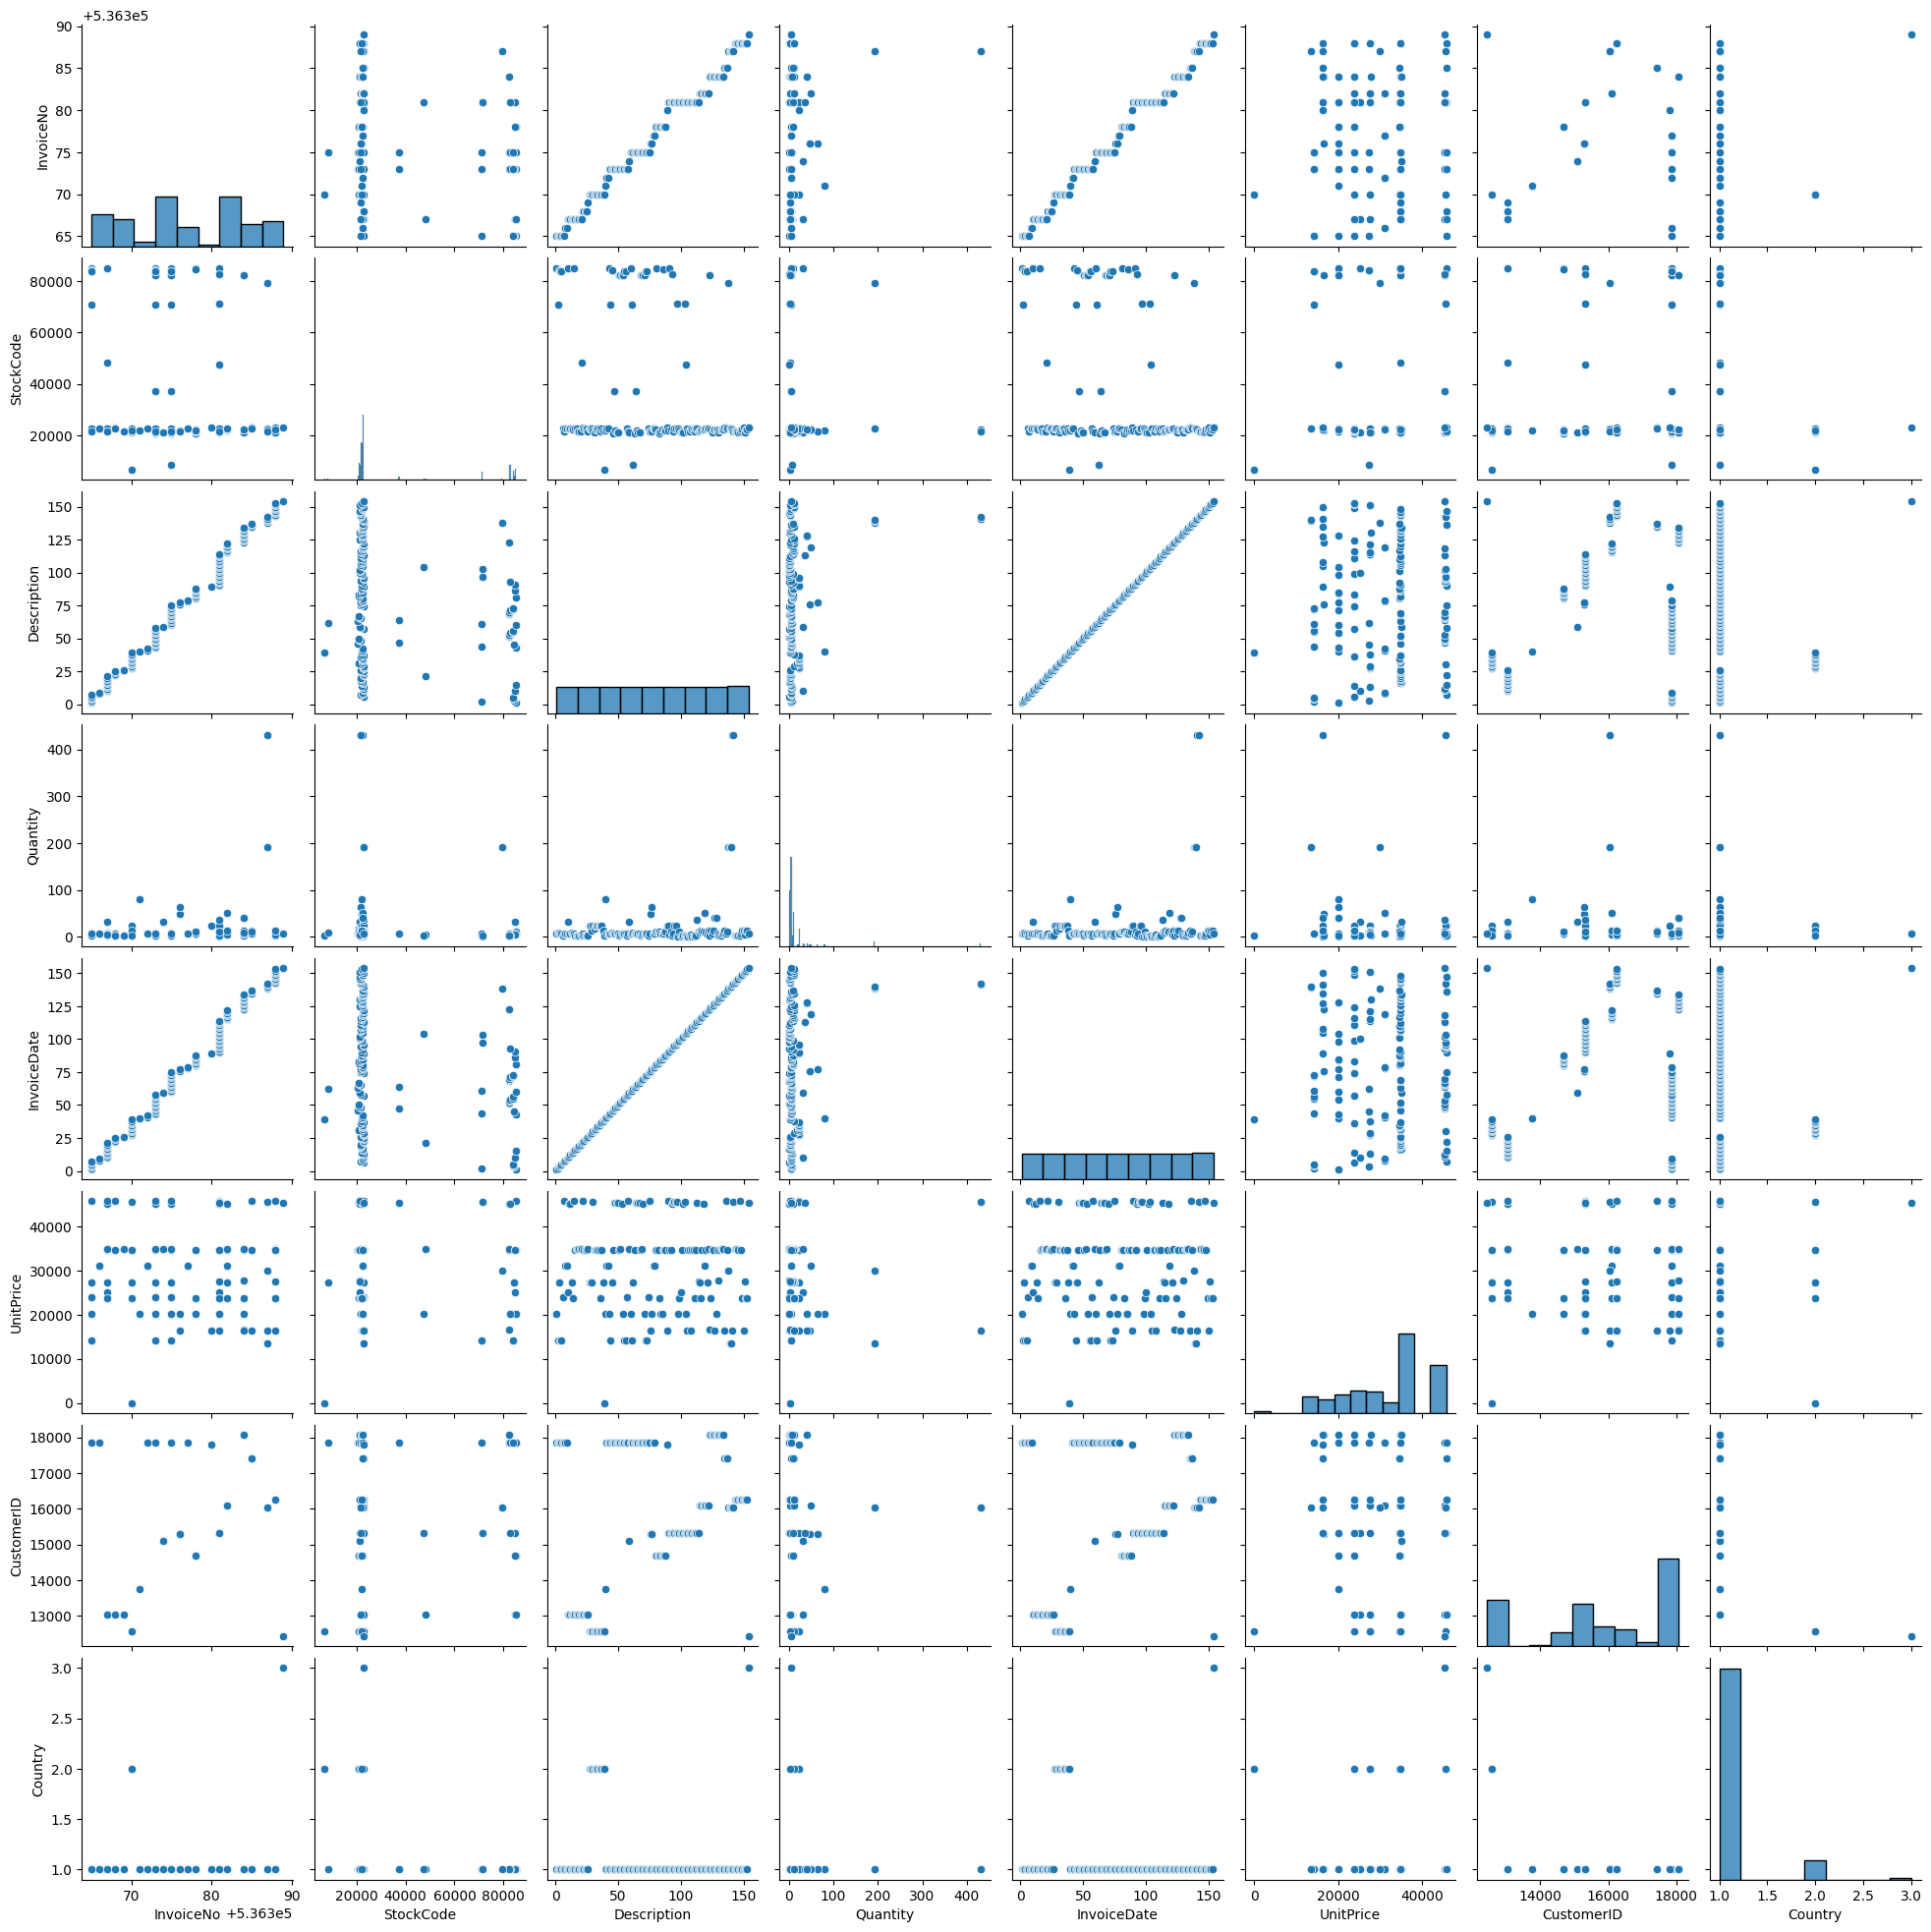

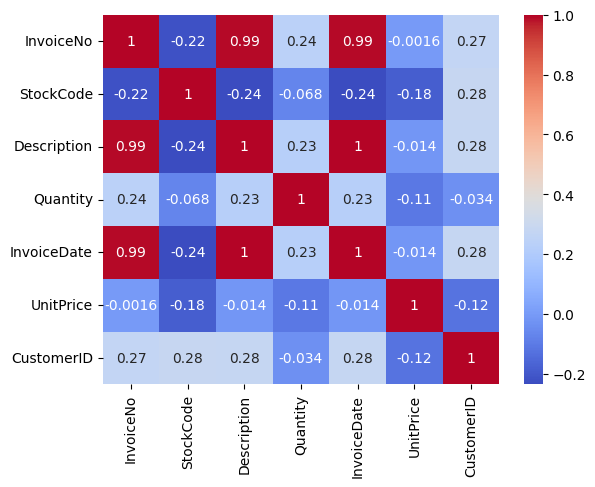

In [5]:
# С помощью функции pairplot из библиотеки Seaborn строим матрицу диаграмм рассеяния для каждой пары переменных в данных.
# Это позволяет визуально оценить линейные и нелинейные зависимости между признаками и распределение каждого признака.
sns.pairplot(data)
plt.show()  # Этот метод используется для отображения всех графиков, созданных с использованием Matplotlib.

# Тепловая карта корреляции
# Сначала вычисляем матрицу корреляции для всех переменных в данных. Корреляция показывает степень линейной связи между переменными. + уда
corr_matrix = data.drop(columns=['Country']).corr()

# Затем используем функцию heatmap из библиотеки Seaborn для визуализации матрицы корреляции в виде тепловой карты.
# Аннотации (annot=True) добавляют числовые значения корреляций на тепловую карту, а cmap определяет цветовую палитру.
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()  # Отображаем тепловую карту корреляций.

Эти графики и карты полезны для анализа данных перед началом процесса машинного обучения, так как они помогают выявить потенциальные зависимости и корреляции между различными признаками.

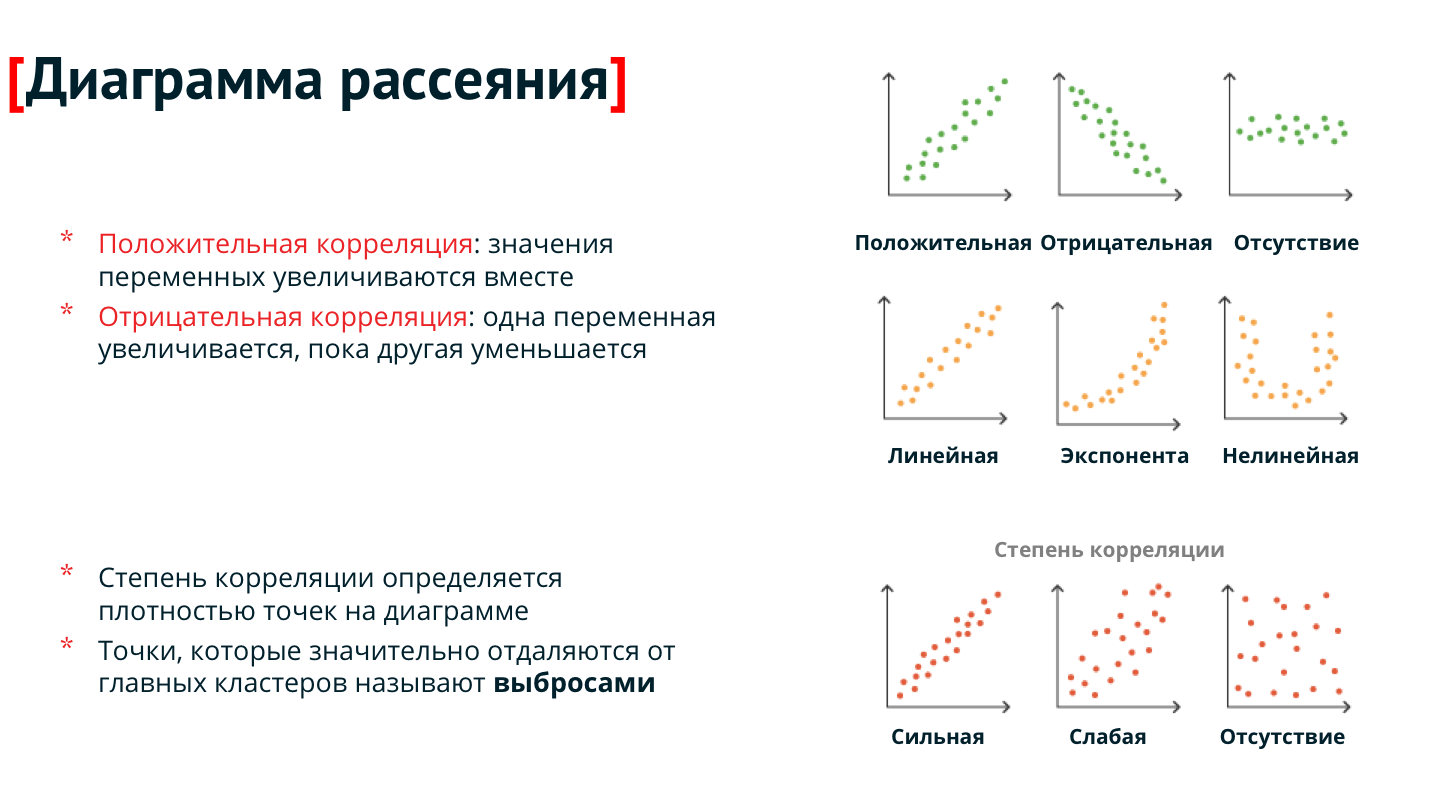

Из тепловой карты корреляций можно определить, какие признаки наиболее сильно коррелируют между собой. Признаки с высокой корреляцией (близкой к 1 или -1) могут быть особенно полезными для предсказания

Например, для предсказания параметра "life", наиболее полезные признаки будут
* fertility
* BMI_female
* BMI_male
* child_mortality

Попробуем предсказать продолжительность жизни на основе других параметров

Если ваша задача включает использование категориальной переменной для обучения модели линейной регрессии, то вам необходимо преобразовать эту категориальную переменную в числовой формат, поскольку линейная регрессия не может напрямую работать с текстовыми данными. Один из распространенных подходов для этого — использование техники под названием "one-hot encoding". Этот метод создает новые столбцы для каждой уникальной категории в исходном столбце, где каждый столбец соответствует одной категории и содержит 0 или 1 в зависимости от того, присутствует ли категория в данной строке.

In [6]:
# Применение one-hot encoding к категориальной переменной 'Region'
data = pd.get_dummies(data, columns=['Country'])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_1,Country_2,Country_3
0,536365,85123,1,6,1,20121,17850,True,False,False
1,536365,71053,2,6,2,14305,17850,True,False,False
2,536365,84406,3,8,3,27426,17850,True,False,False
3,536365,84029,4,6,4,14305,17850,True,False,False
4,536365,84029,5,6,5,14305,17850,True,False,False


<Axes: >

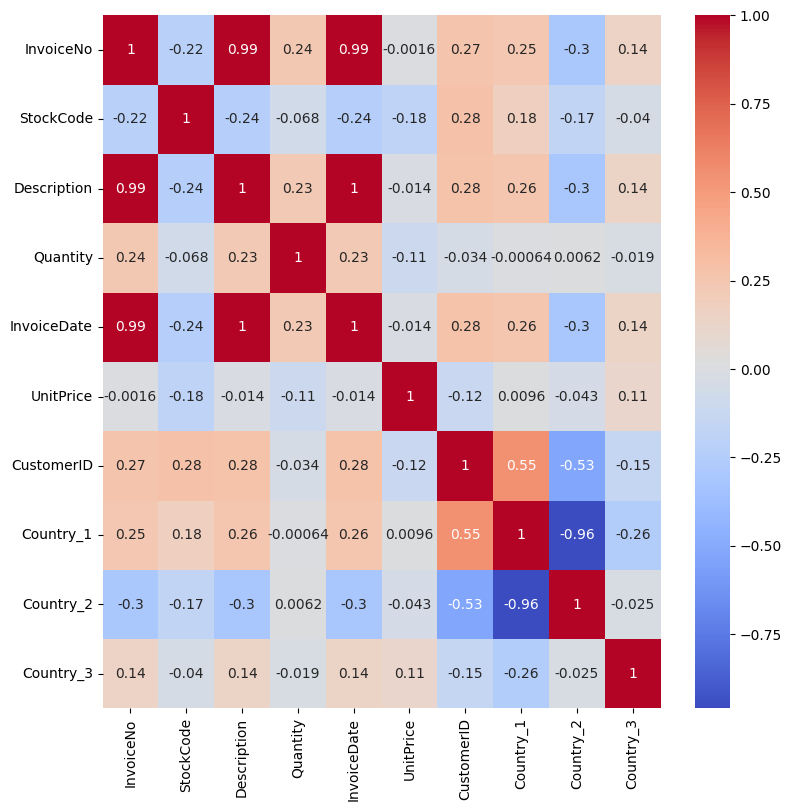

In [ ]:
# Вывод матрицы корреляций с переменными 'Region'
corr_matrix = data.corr()

# Задаем размер ячейки для тепловой матрицы
fig_size = len(corr_matrix.columns) * 0.9

# Создаем фигуру с автоматически подобранным размером
plt.figure(figsize=(fig_size, fig_size))

# Создаем тепловую карту
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [9]:
# Подготовка данных
X = data.drop(columns=['CustomerID','UnitPrice'])  # Исключаем целевую переменную
y = data['UnitPrice']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

RMSE: 9007.331691312833
MAE: 7542.240489552098
R^2: -0.18796956216879135


**Среднеквадратическая ошибка (RMSE - Root Mean Square Error)**
RMSE является квадратным корнем из среднего квадратов всех ошибок. Эта метрика показывает, насколько в среднем предсказанные значения отклоняются от фактических значений. Чем ниже значение RMSE, тем лучше модель предсказывает данные. Значение RMSE равное 2.35 означает, что в среднем предсказания модели отклоняются от фактических значений на примерно 2.35 единицы целевой переменной.

**Средняя абсолютная ошибка (MAE - Mean Absolute Error)**
MAE измеряет среднее абсолютное отклонение предсказанных значений от фактических. В отличие от RMSE, MAE не возведет ошибки в квадрат, что делает эту метрику более устойчивой к выбросам. Значение MAE равное 1.86 говорит о том, что в среднем абсолютное отклонение предсказаний модели от истинных значений составляет около 1.86 единиц целевой переменной.

**Коэффициент детерминации (R² - R-squared)**
R², или коэффициент детерминации, показывает, какой процент вариации целевой переменной объясняется признаками модели. Значения R² находятся в диапазоне от 0 до 1, где 1 означает, что модель идеально предсказывает целевую переменную. Значение R² равное 0.9175 говорит о том, что примерно 91.75% вариации целевой переменной успешно объясняется моделью, что является очень хорошим результатом для большинства прикладных задач.

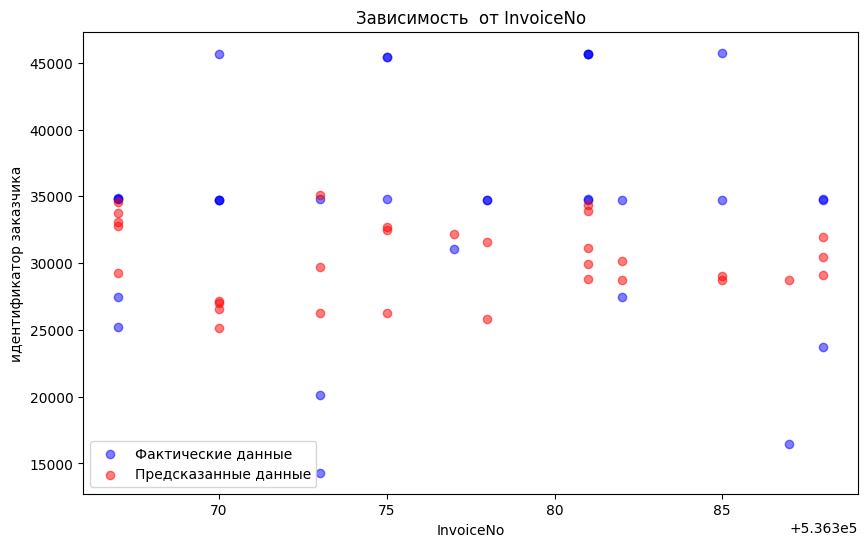

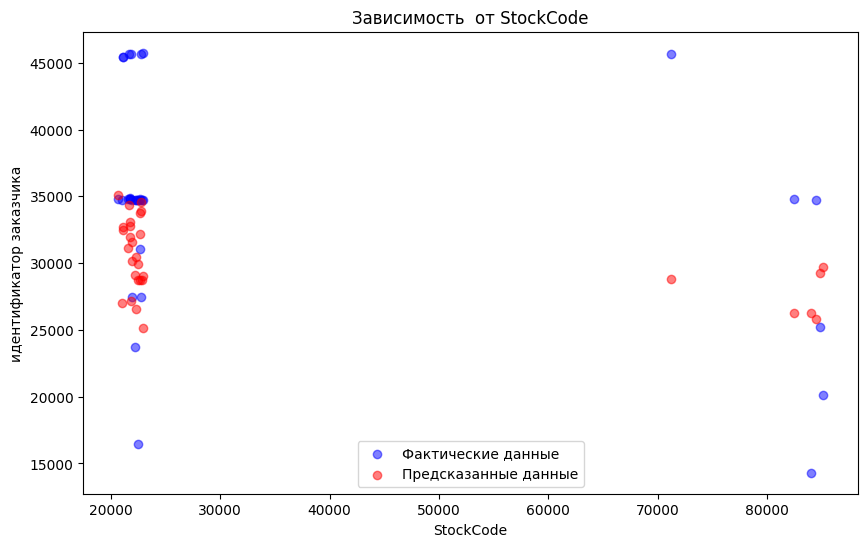

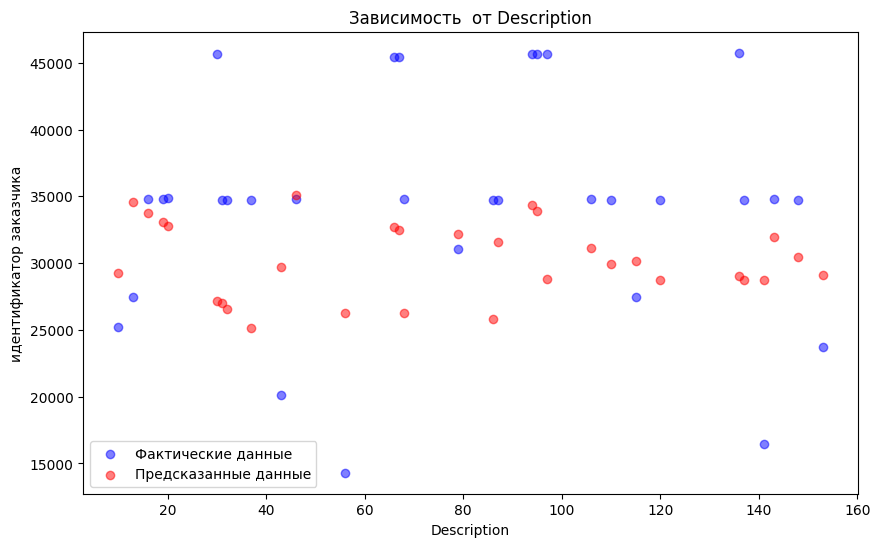

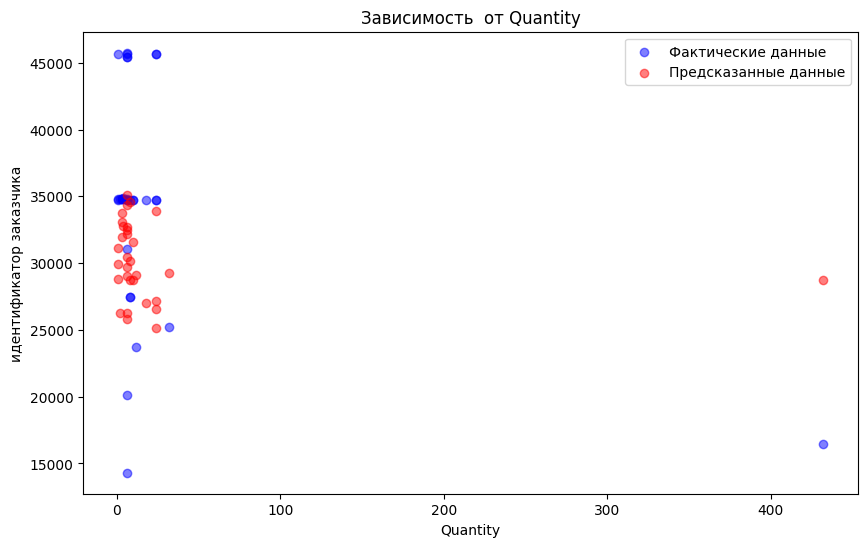

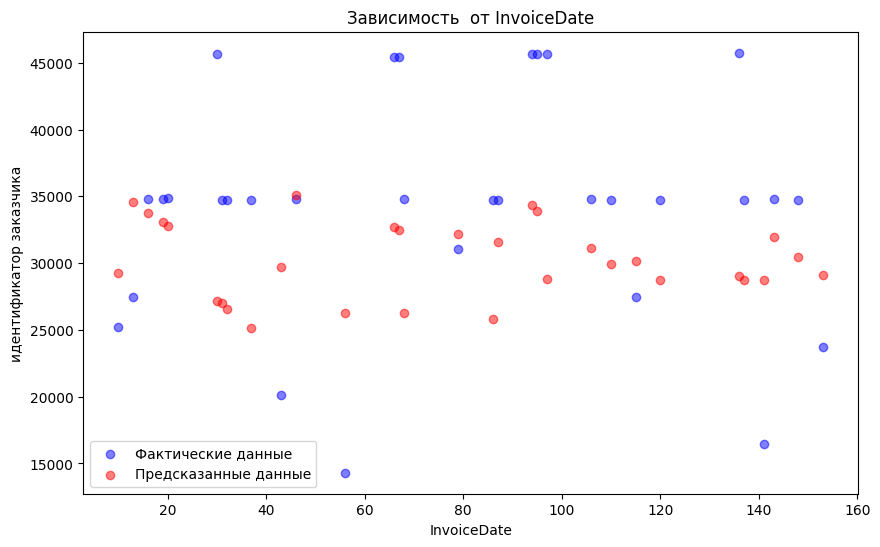

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [11]:
# Перебор всех столбцов в X_test
for feature in X_test.columns:
    # Создание нового графика для каждого признака с размером 10x6
    plt.figure(figsize=(10, 6))

    # Проверка, является ли столбец числовым (float64 или int64 типы данных)
    if X_test[feature].dtype in ['float64', 'int64']:
        # Визуализация фактических данных: рисуем точки для наблюдений тестовой выборки
        plt.scatter(X_test[feature], y_test, color='blue', alpha=0.5, label='Фактические данные')

        # Визуализация предсказанных данных: рисуем точки для предсказаний модели
        plt.scatter(X_test[feature], y_pred, color='red', alpha=0.5, label='Предсказанные данные')

        # Настройка подписей осей: ось X получает название текущего признака, а ось Y - 'Продолжительность жизни' т.к. - это целевой признак
        plt.xlabel(feature)
        plt.ylabel('идентификатор заказчика')

        # Установка заголовка графика, указывающего на зависимость целевой переменной от текущего признака
        plt.title(f'Зависимость  от {feature}')

        # Добавление легенды для различия между фактическими данными и предсказаниями на графике
        plt.legend()

        # Отображение графика. Для каждого признака будет создан свой график.
        plt.show()

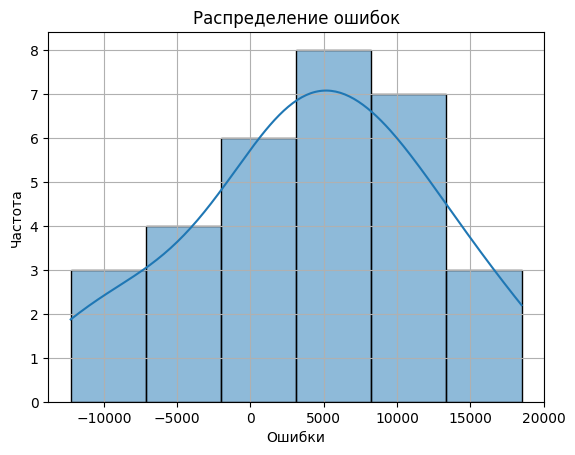

In [12]:
# Вычисляем ошибки модели путем вычитания предсказанных значений из фактических
residuals = y_test - y_pred

# Создание гистограммы ошибок с наложенной линией плотности распределения
sns.histplot(residuals, kde=True)

# Заголовок графика
plt.title('Распределение ошибок')

# Назначение названий для осей
plt.xlabel('Ошибки')
plt.ylabel('Частота')

# Отображение сетки на графике для лучшей читаемости
plt.grid(True)

# Показать график
plt.show()


In [18]:
def predict_life_expectancy(model, input_df):

    prediction = model.predict(input_df)[0]
    return prediction

# пример значений для параметров
your_data_dict = {
    'InvoiceNo':[89],
    'StockCode':[89],
    'Description':[910],
    'Quantity':[56],
    'InvoiceDate':[12090],
    #'UnitPrice':[223342],
    'Country_1':[1],
    'Country_2':[0],
    'Country_3':[0],
    }
#InvoiceNo	StockCode	Description	Quantity	InvoiceDate	UnitPrice	CustomerID	Country_1	Country_2	Country_3
# Список всех регионов (как они были закодированы)


# Добавляем региональные признаки с значениями 0, кроме наблюдаемого региона


# Создание DataFrame из словаря
test_df = pd.DataFrame(your_data_dict)

# Предсказание
predicted_life_expectancy = predict_life_expectancy(model, test_df) # получение предсказания
print(f"\n Предсказанная роста цен: {predicted_life_expectancy:.2f} процента")


 Предсказанная роста цен: -840587844.05 процента
